# Entropy of K-mers

In [1]:
pwd

'/Users/gfeng2001/anaconda3/Practice'

In [2]:
less GCF_000005845.2_ASM584v2_genomic.fna

This cell of code uses the data to find the amount of k-mers for each k. The operation is done using a for loop that loops through the genome and finds substrings of length k, checks to see if that substring has already been found, and then adds it to the k-mer dictionary. Then, the number of unique k-mers is the length of the dictionary.

In [7]:
import numpy as np

f = open("GCF_000005845.2_ASM584v2_genomic.fna", 'r')
#f = open("short.fna", 'r')
i = 0
s = ""
for line in f:
    if i!=0:
        s += line[:-1]
    i+=1
    
k = 10    
    
x = [0]*(len(s)-k+1)
y = [0]*(len(s)-k+1)
curr = {'A': 0, 'C': 0, 'G': 0, 'T': 0}

print(len(s))

def add(char): 
    if char == 'A':
        curr['A'] +=1
    if char == 'C':
        curr['C'] +=1
    if char == 'G':
        curr['G'] +=1
    if char == 'T':
        curr['T'] +=1
    return

def remove(char): 
    if char == 'A':
        curr['A'] -=1
    if char == 'C':
        curr['C'] -=1
    if char == 'G':
        curr['G'] -=1
    if char == 'T':
        curr['T'] -=1
    return

def entropy():
    e=0.0
    if curr['A'] != 0:
        a = curr['A']*1.0/k
        ap = a*np.log2(a)
        e -= ap
    if curr['C'] != 0:
        c = curr['C']*1.0/k
        cp = c*np.log2(c)
        e -= cp
    if curr['G'] != 0:
        g = curr['G']*1.0/k
        gp = g*np.log2(g)
        e -= gp
    if curr['T'] != 0:
        t = curr['T']*1.0/k
        tp = t*np.log2(t)
        e -= tp
    return e
    
for i in range(0, k):
    add(s[i])

x[0] = 0
y[0] = int(10*entropy())
    
for i in range(1, len(s)-k+1): #i is the start position of the k-mer
    remove(s[i-1])
    add(s[i+k-1])
    x[i] = i
    y[i] = int(10*entropy())
    

4641652


This cell of code draws the graph using the data from the previous cell

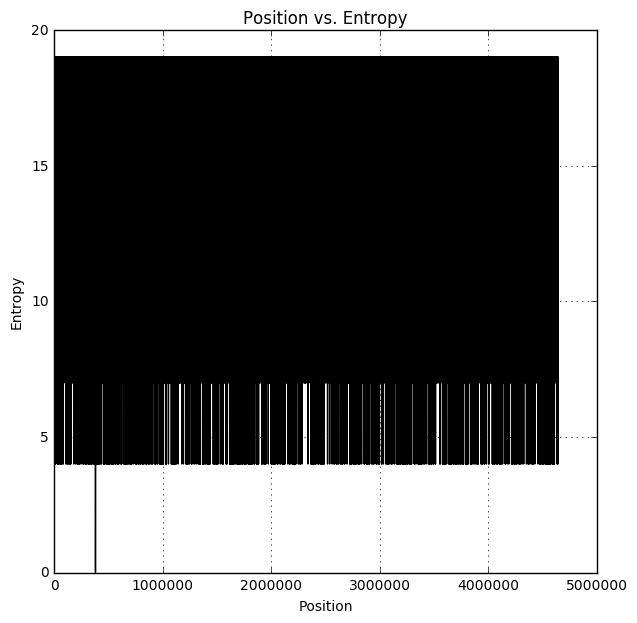

In [8]:
#import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))
#y2 = np.power(4, x)
#log = np.log10(y)
#log2 = np.log10(y2)

ax.set_xlabel('Position')
ax.set_ylabel('Entropy')
#ax.set_yscale("log")
ax.set_title('Position vs. Entropy')
plt.plot(x, y, 'k')
plt.grid(True)
#plt.plot(x, log2, 'k')
plt.show()